In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib

In [476]:
df = pd.read_csv('../../../all_data_joined.csv')
df.head()

,student_id,gender,age,department_id,course_id,difficulty_level,semester_id,instructor_id,attendance_percentage,average_score,grade
0,1,Female,22,1,1,Easy,1,4,65,79.000000,80
1,1,Female,22,1,2,Medium,1,4,66,66.666667,76
2,1,Female,22,1,9,Medium,1,2,72,38.333333,32
3,1,Female,22,1,7,Hard,1,5,40,40.333333,32
4,1,Female,22,1,6,Medium,2,3,99,64.666667,99


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             2105 non-null   int64  
 1   gender                 2105 non-null   object 
 2   age                    2105 non-null   int64  
 3   department_id          2105 non-null   int64  
 4   course_id              2105 non-null   int64  
 5   difficulty_level       2105 non-null   object 
 6   semester_id            2105 non-null   int64  
 7   instructor_id          2105 non-null   int64  
 8   attendance_percentage  2105 non-null   int64  
 9   average_score          2105 non-null   float64
 10  grade                  2105 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 181.0+ KB


In [478]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [480]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
difficulty_map = {'Easy':1, 'Medium':2, 'Hard':3}
df['difficulty_level'] = df['difficulty_level'].map(difficulty_map)


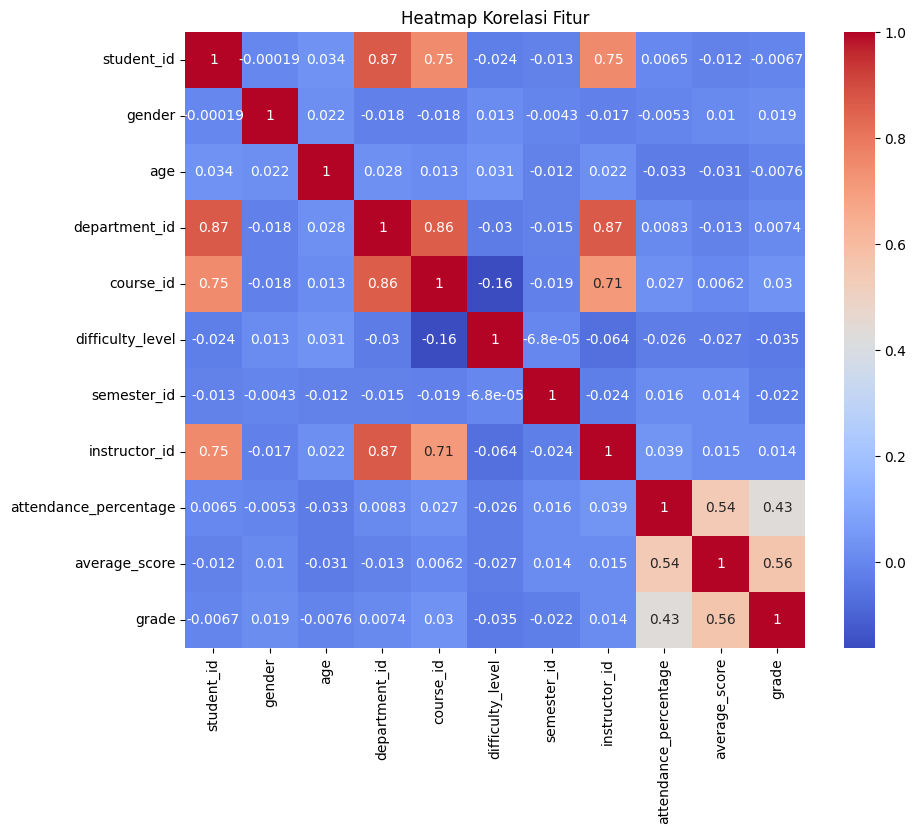

In [481]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [482]:
y = df["attendance_percentage"]

feature = ["average_score", "grade", "semester_id", "course_id"] # lebih bagus make ini
X = df[feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGB Regressor

In [483]:
xgb_model = XGBRegressor(
    n_estimators=300,     
    max_depth=3,          
    learning_rate=0.01,  
    subsample=0.8,       
    colsample_bytree=0.7,
    random_state=42,

    colsample_bylevel=0.7,
    gamma=0.1,            
    min_child_weight=5,  
    reg_alpha=1,       
    reg_lambda=2,     
    subsample_bytree=1,
)

# model training
xgb_model.fit(
    X_train, y_train
)

# predict dan evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

e:\5th Sem\7. Advanced Database\Django\db_final\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:23:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "subsample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mean Squared Error: 142.43731689453125
R² Score: 0.40780919790267944


In [484]:
# save model

joblib.dump(xgb_model, '../../../xgb_model_student_attendance.pkl')

['../../../xgb_model_student_attendance.pkl']

In [485]:
# predict attendance percentage for new data
new_data = pd.DataFrame({
    'average_score': [85, 90],
    'grade': [70, 80],
    'semester_id': [1, 2],
    'course_id': [1, 2]
})

predicted_attendance = xgb_model.predict(new_data)
print("Predicted Attendance Percentage for New Data:")
print(predicted_attendance)

Predicted Attendance Percentage for New Data:
[76.56303  79.287186]
